In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import glob
import re

In [79]:
directories = ['Results', 'redatarepresentation']
dataset = {}
for directory in directories:
    files = glob.glob(directory+'/*.xlsx')
    for file in files:
        filename = file.split('/')[1].split('.')[0]
        df = pd.read_excel(file, header=None)
        entry = list(df.values.flatten())
        rng = max(entry) - min(entry)
        avg = np.mean(entry)

        red_cells_count = len(filename.split(',')) - 2
        entry.append(max(entry))
        entry.append(min(entry))
        entry.append(avg)
        entry.append(rng)
        entry.append(red_cells_count)
        dataset[filename] = entry

df = pd.DataFrame(dataset)
df = df.T
df = df.rename(columns={20: 'red cells count', 17: 'min', 16: 'max', 19: 'range', 18: 'average score'})

df.to_csv('count.csv')

In [83]:
pattern = r'\(6,3.*'
df = pd.read_csv('count.csv')

df_filtered = df[~df['Unnamed: 0'].str.contains(pattern, case=True)]

df_filtered.set_index('Unnamed: 0', inplace=True)

df_filtered.to_csv('count_zeros.csv')

df = df_filtered

In [84]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,max,min,average score,range,red cells count
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
"(6,0,5,6,7,8,9,10,11,12)",12.217616,12.226429,12.223962,12.204093,12.146521,12.157388,12.141975,12.111747,12.148818,12.163572,...,12.135293,12.243629,12.247130,12.235603,12.237469,12.247130,12.111747,12.185881,0.135383,8.0
"(6,0,5,6)",12.018418,12.013952,11.998957,12.004283,11.949590,11.944170,12.002432,11.992766,11.997261,11.993196,...,12.000117,12.008843,12.002464,11.993703,12.017217,12.018418,11.944170,11.996156,0.074247,2.0
"(6,0,6,7)",12.066549,12.056210,12.040359,12.042734,12.045311,11.975528,11.965379,12.031286,12.037205,12.036184,...,12.031697,12.041844,12.038105,12.037925,12.047991,12.066549,11.965379,12.033241,0.101170,2.0
"(6,0,5,6,9,10)",12.257684,12.247743,12.244220,12.251575,12.177804,12.181592,12.242291,12.238952,12.176831,12.195619,...,12.245356,12.245641,12.249947,12.256813,12.257418,12.257684,12.176831,12.232109,0.080853,4.0
"(6,0,2,3,4)",11.949176,11.850575,11.832983,11.849549,11.919562,11.923867,11.920429,11.913746,11.934274,11.931909,...,11.924619,11.943757,11.941438,11.930382,11.946553,11.949176,11.832983,11.915632,0.116192,3.0
"(6,0,8)",11.946178,11.943918,11.931283,11.936908,11.946754,11.940832,11.929005,11.865240,11.947327,11.934240,...,11.932848,11.950172,11.947498,11.945122,11.950771,11.950771,11.865240,11.936223,0.085531,1.0
"(6,0,3,4,8)",11.995766,11.991654,11.920950,11.939496,11.987290,11.987492,11.991606,11.922667,11.976957,11.983560,...,11.979096,11.991469,11.991966,11.968013,11.990427,11.995766,11.920950,11.974953,0.074816,3.0
"(6,0,7,8,11,15)",12.053218,12.046964,12.061732,12.057974,12.050712,12.045432,11.981816,11.994767,12.043118,12.040916,...,12.055186,12.066929,12.072851,12.006682,12.078723,12.078723,11.981816,12.040654,0.096907,4.0
"(6,0,1,2,3,4,5,6,7,8)",12.075700,12.063448,12.097357,12.119548,12.107325,12.102840,12.149288,12.139355,12.234299,12.229283,...,12.251801,12.263309,12.274047,12.277097,12.279160,12.279160,12.063448,12.182627,0.215711,8.0


In [58]:
indices = []
temp = sorted(df['average score'])
for i in range(len(temp)):
    if temp[i] in list(df.iloc[-3:]['average score']):
        indices.append(i)
indices

[56, 57, 58]

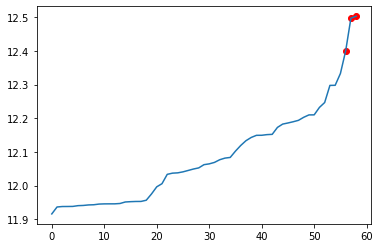

In [62]:
# Indices for red points
red_indices = [56, 57, 58]

# Get the corresponding values for red points
red_values = df.iloc[-3:]['average score']

red_dot_points = [(i, j) for i, j in zip(sorted(red_values, reverse=False), red_indices)]

# Plotting the data points
plt.plot([i for i in range(59)], sorted(list(df['average score'])))  # 'bo' stands for blue color and circles

# Adding red dots at specific points
for point in red_dot_points:
    plt.scatter(point[1], point[0], color='red', marker='o')

# Display the plot
plt.show()

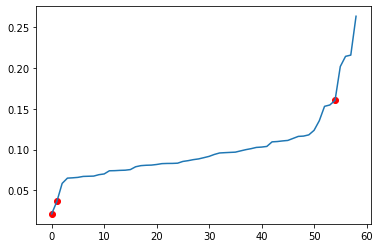

In [63]:
factor = 'range'
red_indices = []
temp = sorted(df[factor])
for i in range(len(temp)):
    if temp[i] in list(df.iloc[-3:][factor]):
        red_indices.append(i)
red_values = df.iloc[-3:][factor]

red_dot_points = [(i, j) for i, j in zip(sorted(red_values, reverse=False), red_indices)]

# Plotting the data points
plt.plot([i for i in range(59)], sorted(list(df[factor])))  # 'bo' stands for blue color and circles

# Adding red dots at specific points
for point in red_dot_points:
    plt.scatter(point[1], point[0], color='red', marker='o')

# Display the plot
plt.show()

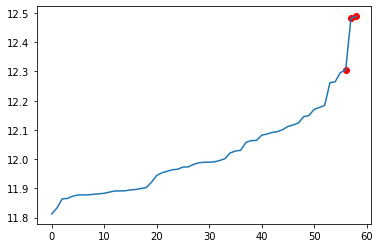

In [85]:
factor = 'min'
red_indices = []
temp = sorted(df[factor])
for i in range(len(temp)):
    if temp[i] in list(df.iloc[-3:][factor]):
        red_indices.append(i)
red_values = df.iloc[-3:][factor]

red_dot_points = [(i, j) for i, j in zip(sorted(red_values, reverse=False), red_indices)]

# Plotting the data points
plt.plot([i for i in range(59)], sorted(list(df[factor])))  # 'bo' stands for blue color and circles

# Adding red dots at specific points
for point in red_dot_points:
    plt.scatter(point[1], point[0], color='red', marker='o')

# Display the plot
plt.show()

In [66]:
df.sort_values(by='average score').to_csv('sorted_zeros_abs.csv')

In [5]:
df = pd.read_csv('normalized.csv', index_col='Unnamed: 0')
df.iloc[0]

0                   0.338270
1                   0.000000
2                   0.021000
3                   0.190427
4                   4.615179
5                   5.551126
6                   6.381065
7                   6.518881
8                   6.614743
9                   7.239784
10                  8.227595
11                  8.513226
12                  7.790420
13                  9.130512
14                  9.728298
15                 10.000000
red cells count     4.000000
Name: (6,3,5,6,9,13), dtype: float64

In [67]:
directories = ['Results', 'redatarepresentation']
dataset = {}
for directory in directories:
    files = glob.glob(directory+'/*.xlsx')
    for file in files:
        filename = file.split('/')[1].split('.')[0]
        df = pd.read_excel(file, header=None)
        entry = list(df.values.flatten())
        
        min_val = min(entry)
        max_val = max(entry)
        normalized_array = list(10 * (entry - min_val) / (max_val - min_val))
        
        red_cells_count = len(filename.split(',')) - 2
        normalized_array.append(red_cells_count)
        dataset[filename] = normalized_array

df = pd.DataFrame(dataset)
df = df.T
df = df.rename(columns={16: 'red cells count'})

df.to_csv('normalized.csv')

In [68]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,red cells count
"(6,3,5,6,9,13)",0.338270,0.000000,0.021000,0.190427,4.615179,5.551126,6.381065,6.518881,6.614743,7.239784,8.227595,8.513226,7.790420,9.130512,9.728298,10.000000,4.0
"(6,0,5,6,7,8,9,10,11,12)",7.819928,8.470905,8.288724,6.821089,2.568593,3.371290,2.232789,0.000000,2.738242,3.828064,1.558803,1.739193,9.741393,10.000000,9.148578,9.286352,8.0
"(6,0,5,6)",10.000000,9.398588,7.378956,8.096222,0.729944,0.000000,7.846936,6.545073,7.150484,6.602978,7.672501,7.535169,8.710477,7.851262,6.671308,9.838242,2.0
"(6,0,6,7)",10.000000,8.978134,7.411325,7.646060,7.900776,1.003165,0.000000,6.514557,7.099609,6.998695,7.133162,6.555115,7.558121,7.188493,7.170743,8.165672,2.0
"(6,0,5,6,9,10)",10.000000,8.770501,8.334729,9.244463,0.120392,0.588844,8.096143,7.683204,0.000000,2.323692,8.340117,8.475256,8.510501,9.043064,9.892249,9.967143,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(6,0,1,2,3,4,5,6,7,8,9,10,11,12)",3.290855,1.317437,0.000000,0.008940,0.669660,1.436291,0.337604,1.010882,0.849357,2.498233,1.141872,2.158513,8.847157,9.184703,9.213691,10.000000,12.0
"(6,0,2,3,6,7)",8.877676,0.919812,0.000000,8.281086,8.488178,2.287760,0.507644,8.107124,8.931633,8.282056,8.410811,8.832779,9.573972,9.028525,9.040778,10.000000,4.0
"(6,0) trial 1",0.000000,0.997061,2.416883,2.342544,4.177305,7.739118,8.589409,6.833795,5.683579,7.359560,8.232023,10.000000,5.017747,6.126885,8.827743,8.925653,0.0
"(6,0) trial 3",1.478404,0.000000,0.690091,3.398100,5.102721,5.112483,6.115465,5.943343,6.834479,7.152285,7.800249,8.368113,8.900360,8.876194,9.203476,10.000000,0.0


In [69]:
pattern = r'\(6,3.*'
df = pd.read_csv('normalized.csv')

df_filtered = df[~df['Unnamed: 0'].str.contains(pattern, case=True)]

df_filtered.set_index('Unnamed: 0', inplace=True)

df_filtered.to_csv('count_zeros_normal.csv')

df = df_filtered

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,red cells count
Unnamed: 0,,,,,,,,,,,,,,,,,
"(6,0,5,6,7,8,9,10,11,12)",7.819928,8.470905,8.288724,6.821089,2.568593,3.371290,2.232789,0.000000,2.738242,3.828064,1.558803,1.739193,9.741393,10.000000,9.148578,9.286352,8.0
"(6,0,5,6)",10.000000,9.398588,7.378956,8.096222,0.729944,0.000000,7.846936,6.545073,7.150484,6.602978,7.672501,7.535169,8.710477,7.851262,6.671308,9.838242,2.0
"(6,0,6,7)",10.000000,8.978134,7.411325,7.646060,7.900776,1.003165,0.000000,6.514557,7.099609,6.998695,7.133162,6.555115,7.558121,7.188493,7.170743,8.165672,2.0
"(6,0,5,6,9,10)",10.000000,8.770501,8.334729,9.244463,0.120392,0.588844,8.096143,7.683204,0.000000,2.323692,8.340117,8.475256,8.510501,9.043064,9.892249,9.967143,4.0
"(6,0,2,3,4)",10.000000,1.513977,0.000000,1.425692,7.451349,7.821833,7.525926,6.950791,8.717489,8.514003,8.977507,7.886583,9.533674,9.334037,8.382564,9.774302,3.0
"(6,0,8)",9.462993,9.198797,7.721531,8.379219,9.530354,8.837910,7.455143,0.000000,9.597344,8.067218,7.743220,7.904472,9.929938,9.617340,9.339556,10.000000,1.0
"(6,0,3,4,8)",10.000000,9.450424,0.000000,2.478768,8.867014,8.894140,9.443897,0.229411,7.485891,8.368547,8.005105,7.771795,9.425718,9.492082,6.290418,9.286365,3.0
"(6,0,7,8,11,15)",7.368111,6.722710,8.246679,7.858921,7.109440,6.564622,0.000000,1.336467,6.325905,6.098636,1.200633,7.571211,8.782980,9.394005,2.565923,10.000000,4.0
"(6,0,1,2,3,4,5,6,7,8)",0.567986,0.000000,1.571968,2.600701,2.034033,1.826113,3.979373,3.518898,7.920342,7.687792,9.027521,8.731707,9.265190,9.762967,9.904361,10.000000,8.0


In [96]:
n_df = pd.read_csv('normalized.csv', index_col='Unnamed: 0')
diffs = []
for r in range(len(n_df)):
    data = sorted(n_df.iloc[r][[i for i in range(16)]])
    pipi = [data[i] - data[i - 1] for i in range(1, len(data))]
    diffs.append(max(pipi))
n_df['maxDiff'] = diffs
n_df.to_csv('normalized_maxdiff.csv')

In [108]:
pattern = r'\(6,3.*'
df = pd.read_csv('normalized_maxdiff.csv')

df_filtered = df[~df['Unnamed: 0'].str.contains(pattern, case=True)]

df_filtered.set_index('Unnamed: 0', inplace=True)

df_filtered.to_csv('normalized_zeros_maxdiff.csv')

In [54]:
n_df = pd.read_csv('normalized.csv', index_col='Unnamed: 0')
stds = []
for r in range(len(n_df)):
    data = list(n_df.iloc[r][[i for i in range(16)]])
    stds.append(np.std(data))
n_df['StDev'] = stds
n_df.to_csv('normalized_std.csv')

In [56]:
n_df = pd.read_csv('normalized.csv', index_col='Unnamed: 0')
variance_per_column = n_df[[str(i) for i in range(16)]].var(axis=1)
n_df['Variance'] = variance_per_column
n_df.to_csv('normalized_var.csv')

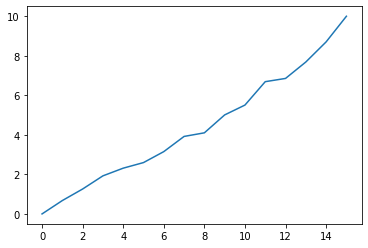

In [7]:
data = sorted(np.array(df.iloc[100][[str(i) for i in range(16)]]))
plt.plot(data)

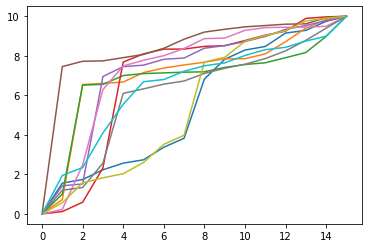

In [70]:
for r in range(len(df)-49):
    data = sorted(np.array(df.iloc[r][[str(i) for i in range(16)]]))
    plt.plot(data)

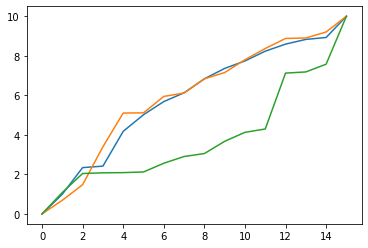

In [72]:
for r in range(len(df)-3, len(df)):
    data = sorted(np.array(df.iloc[r][[str(i) for i in range(16)]]))
    plt.plot(data)

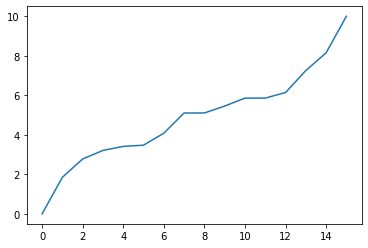

In [69]:
data = sorted(np.array(n_df.iloc[6][[str(i) for i in range(16)]]))
plt.plot(data)

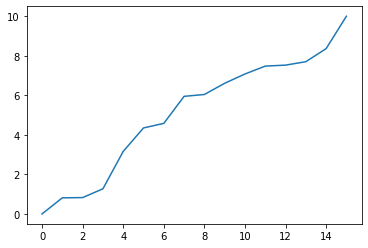

In [72]:
data = sorted(np.array(n_df.iloc[99][[str(i) for i in range(16)]]))
plt.plot(data)

In [77]:
n_df = pd.read_csv('normalized.csv')
n_df.sort_values(by=['Unnamed: 0'], inplace=True)
n_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,red cells count
99,"(6,0)",10.000000,7.699809,8.361700,7.477650,0.000000,0.826256,1.269997,0.813360,3.162000,4.349293,4.579910,6.041553,7.526783,7.077836,5.947253,6.608902,0.0
53,"(6,0,1)",0.000000,9.296716,9.056541,8.625925,8.743938,7.981548,8.575926,8.808418,9.218514,7.875118,8.058642,8.540025,9.588905,9.109590,8.405937,10.000000,1.0
87,"(6,0,1,2)",0.781072,0.000000,2.720825,3.950571,4.374548,5.366499,5.720474,6.983723,7.352632,7.323764,8.274801,8.507553,9.344779,9.115886,9.569152,10.000000,2.0
42,"(6,0,1,2,3)",2.406011,1.928358,0.000000,8.160404,8.938718,9.416562,8.769965,7.479128,8.691230,9.532061,9.614458,7.459806,9.656600,9.593624,9.045636,10.000000,3.0
35,"(6,0,1,2,3,4)",2.058210,3.642757,0.912715,0.000000,8.230313,7.545347,7.792526,6.123094,8.142709,8.014265,8.407049,8.192999,9.568266,9.496713,9.555856,10.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,"(6,3,7,8,11,15)",7.791552,10.000000,7.880954,6.348145,6.141329,5.991780,5.309219,1.956333,0.253196,3.127719,0.000000,3.006279,5.450075,4.524057,2.822549,3.134340,4.0
9,"(6,3,9,10,11,12)",9.197890,10.000000,8.419165,7.505065,6.408107,6.610474,6.912298,6.133435,1.955242,1.751719,0.000000,0.795822,1.752628,2.815199,2.562908,0.114147,4.0
21,"(6,3,9,10,11,12,13,14,15,16)",9.856718,10.000000,9.937169,9.964796,5.674034,5.495524,5.573293,6.072036,0.000000,0.648893,0.582792,0.594099,0.940804,0.847602,0.835838,0.762691,8.0
30,"(6,3,9,10,13)",0.000000,0.742030,0.936758,1.350714,1.822917,3.501731,4.175010,5.517364,2.887473,4.833619,7.376537,7.481702,5.504945,8.488045,9.804610,10.000000,3.0


In [78]:
n_df.iloc[0]

Unnamed: 0            (6,0)
0                      10.0
1                  7.699809
2                    8.3617
3                   7.47765
4                       0.0
5                  0.826256
6                  1.269997
7                   0.81336
8                     3.162
9                  4.349293
10                  4.57991
11                 6.041553
12                 7.526783
13                 7.077836
14                 5.947253
15                 6.608902
red cells count         0.0
Name: 99, dtype: object

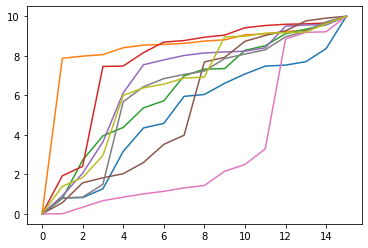

In [80]:
for r in range(len(n_df)-92):
    data = sorted(np.array(n_df.iloc[r][[i for i in range(1, 17)]]))
    plt.plot(data)

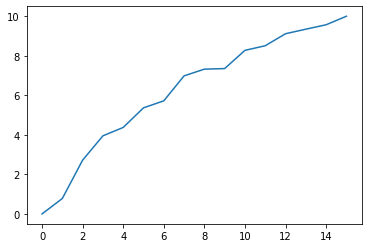

In [83]:
data = sorted(np.array(n_df.iloc[2][[i for i in range(1, 17)]]))
plt.plot(data)

In [110]:
df = pd.read_csv('normalized_zeros_maxdiff.csv', index_col='Unnamed: 0')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,red cells count,maxDiff
Unnamed: 0,,,,,,,,,,,,,,,,,,
"(6,0,5,6,7,8,9,10,11,12)",7.819928,8.470905,8.288724,6.821089,2.568593,3.371290,2.232789,0.000000,2.738242,3.828064,1.558803,1.739193,9.741393,10.000000,9.148578,9.286352,8.0,2.993025
"(6,0,5,6)",10.000000,9.398588,7.378956,8.096222,0.729944,0.000000,7.846936,6.545073,7.150484,6.602978,7.672501,7.535169,8.710477,7.851262,6.671308,9.838242,2.0,5.815129
"(6,0,6,7)",10.000000,8.978134,7.411325,7.646060,7.900776,1.003165,0.000000,6.514557,7.099609,6.998695,7.133162,6.555115,7.558121,7.188493,7.170743,8.165672,2.0,5.511391
"(6,0,5,6,9,10)",10.000000,8.770501,8.334729,9.244463,0.120392,0.588844,8.096143,7.683204,0.000000,2.323692,8.340117,8.475256,8.510501,9.043064,9.892249,9.967143,4.0,5.359512
"(6,0,2,3,4)",10.000000,1.513977,0.000000,1.425692,7.451349,7.821833,7.525926,6.950791,8.717489,8.514003,8.977507,7.886583,9.533674,9.334037,8.382564,9.774302,3.0,5.436814
"(6,0,8)",9.462993,9.198797,7.721531,8.379219,9.530354,8.837910,7.455143,0.000000,9.597344,8.067218,7.743220,7.904472,9.929938,9.617340,9.339556,10.000000,1.0,7.455143
"(6,0,3,4,8)",10.000000,9.450424,0.000000,2.478768,8.867014,8.894140,9.443897,0.229411,7.485891,8.368547,8.005105,7.771795,9.425718,9.492082,6.290418,9.286365,3.0,3.811650
"(6,0,7,8,11,15)",7.368111,6.722710,8.246679,7.858921,7.109440,6.564622,0.000000,1.336467,6.325905,6.098636,1.200633,7.571211,8.782980,9.394005,2.565923,10.000000,4.0,3.532713
"(6,0,1,2,3,4,5,6,7,8)",0.567986,0.000000,1.571968,2.600701,2.034033,1.826113,3.979373,3.518898,7.920342,7.687792,9.027521,8.731707,9.265190,9.762967,9.904361,10.000000,8.0,3.708419


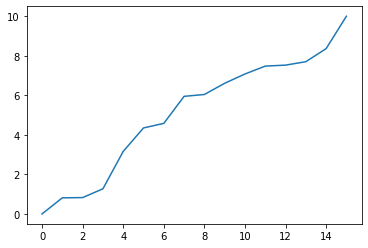

In [117]:
plt.plot(sorted(df.iloc[-1][[i for i in range(16)]]))

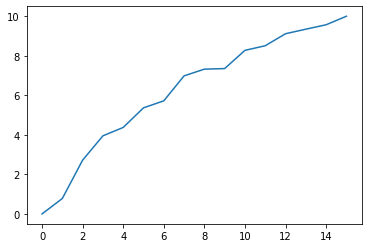

In [118]:
plt.plot(sorted(df.iloc[-9][[i for i in range(16)]]))